In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('realtor-data.csv')
df.head()


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [2]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,174249.000000,175136.000000,153569.000000,205805.000000,1.757230e+05,2.060000e+05
mean,3.531383,2.622431,8.618086,2165.771808,2.233759e+03,8.729601e+05
std,2.688206,2.929336,629.443554,1731.612917,4.198274e+03,1.448204e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.130000,1235.000000,1.152000e+03,2.499000e+05
50%,3.000000,2.000000,0.340000,2038.000000,1.728000e+03,5.249000e+05
75%,4.000000,3.000000,1.140000,2191.000000,2.634000e+03,8.900000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


In [3]:
print(df.state.nunique())
df.state.value_counts()

12


Massachusetts     153666
Puerto Rico        24679
Connecticut        12207
Rhode Island        4907
New Hampshire       4721
Virgin Islands      2573
New York            1874
Vermont             1324
South Carolina        24
Tennessee             18
Virginia               5
New Jersey             2
Name: state, dtype: int64

In [4]:
mass = df.loc[df['state'] == 'Massachusetts']

In [5]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,131670.000000,132309.000000,110714.000000,153654.000000,133166.000000,1.536660e+05
mean,3.522101,2.693301,4.095155,1863.680828,2281.302367,1.013823e+06
std,2.959423,3.282514,76.854123,466.956594,2540.372190,1.478948e+06
min,1.000000,1.000000,0.000000,1001.000000,104.000000,1.000000e+00
25%,2.000000,2.000000,0.140000,1507.000000,1170.000000,3.650000e+05
50%,3.000000,2.000000,0.330000,2050.000000,1768.000000,6.290000e+05
75%,4.000000,3.000000,1.070000,2143.000000,2709.000000,9.990000e+05
max,99.000000,198.000000,9035.000000,2893.000000,99999.000000,3.000000e+07


<Figure size 800x600 with 0 Axes>

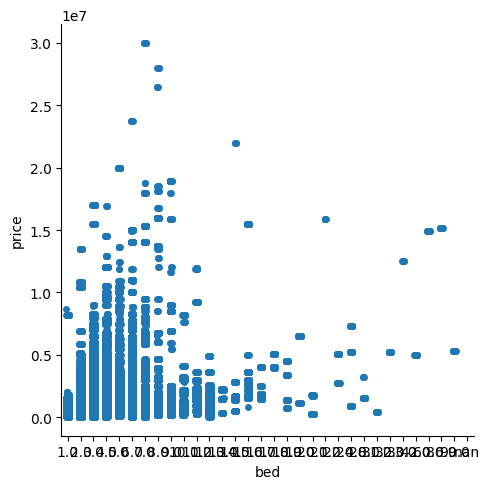

In [6]:
cont_variables = ['bed', 'bath', 'acre_lot', 'house_size']

# for i in range(len(cont_variables)):
#     sns.displot(data=mass, x=cont_variables[i], y='price')

plt.figure(figsize=(8,6))
sns.catplot(data=mass, x='bed', y='price')

In [7]:
print(mass.bed.loc[mass['bed'] > 6].count() / mass.bed.count())
print(mass.bath.loc[mass['bath'] > 4].count() / mass.bath.count())

0.06505658084605453
0.09169444255492823


Deleting listings with greater than 6 bedrooms will only get rid of 6.5% of the mass dataset

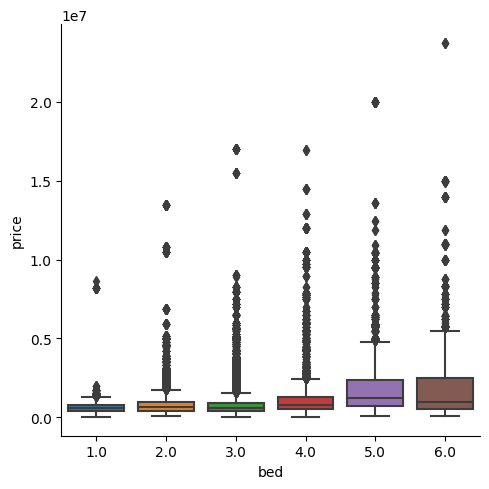

In [8]:
mass = mass.loc[mass['bed'] <= 6]

# mass.head()
sns.catplot(data=mass, x='bed', y='price', kind='box')

In [9]:
print(mass.bath.loc[mass['bath'] > 4].count() / mass.bath.count())

0.06487246106835302


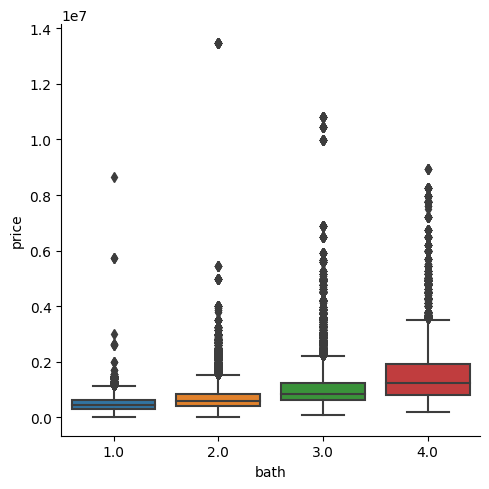

In [10]:
mass = mass.loc[mass['bath'] <= 4]

# mass.head()
sns.catplot(data=mass, x='bath', y='price', kind='box')

In [11]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,114454.000000,114454.000000,74138.000000,114454.000000,114403.000000,1.144540e+05
mean,2.914219,2.210443,2.785336,1913.332029,1816.954372,8.600547e+05
std,1.183960,0.918442,92.632200,436.627190,1542.259532,8.596563e+05
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,2.000000,2.000000,0.120000,1604.000000,1106.000000,4.250000e+05
50%,3.000000,2.000000,0.250000,2110.000000,1617.000000,6.490000e+05
75%,4.000000,3.000000,0.610000,2145.000000,2291.000000,9.350000e+05
max,6.000000,4.000000,9035.000000,2893.000000,99999.000000,1.347500e+07


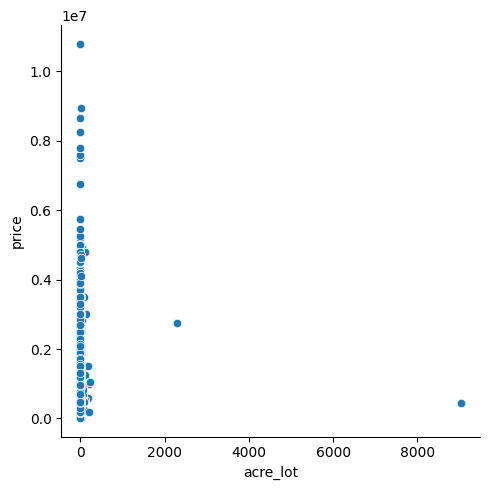

In [12]:
sns.relplot(data=mass, x='acre_lot', y='price')

Big outliers in acre_lot so I am going to delete rows with acre_lot > 150

In [13]:
print(mass.acre_lot.loc[mass['acre_lot'] > 150].count() / mass.acre_lot.count())

0.0013623243141169172


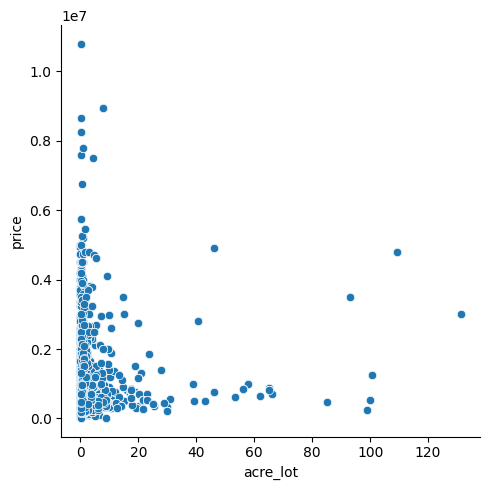

In [14]:
mass = mass.loc[mass['acre_lot'] <= 150]

sns.relplot(data=mass, x='acre_lot', y='price')

In [15]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,74037.000000,74037.000000,74037.000000,74037.000000,73995.000000,7.403700e+04
mean,3.339465,2.306117,1.035579,1844.648851,2010.608947,7.545083e+05
std,1.136927,0.921424,4.936647,471.275390,950.278380,6.452596e+05
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,3.000000,2.000000,0.120000,1501.000000,1300.000000,3.999000e+05
50%,3.000000,2.000000,0.250000,1905.000000,1823.000000,5.999000e+05
75%,4.000000,3.000000,0.600000,2145.000000,2550.000000,8.690000e+05
max,6.000000,4.000000,131.340000,2893.000000,9800.000000,1.080000e+07


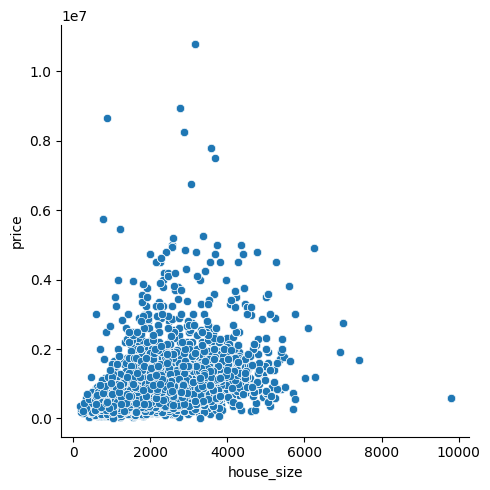

In [16]:
sns.relplot(data=mass, x='house_size', y='price')

In [17]:
print(mass.house_size.loc[mass['house_size'] > 6000].count() / mass.house_size.count())

0.0015947023447530238


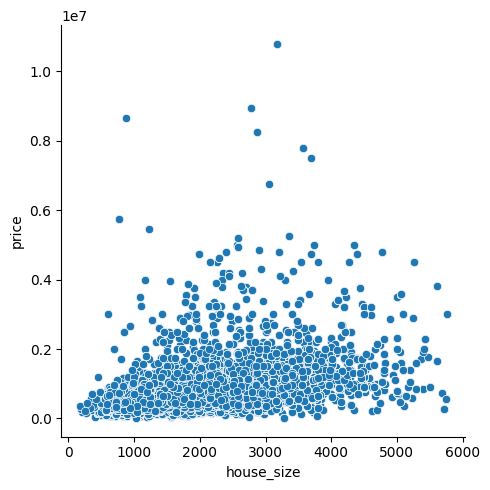

In [18]:
mass = mass.loc[mass['house_size'] <= 6000]

sns.relplot(data=mass, x='house_size', y='price')

In [19]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,73877.000000,73877.000000,73877.000000,73877.000000,73877.000000,7.387700e+04
mean,3.338089,2.303356,1.025845,1844.539681,2003.010477,7.519063e+05
std,1.135868,0.919719,4.905475,471.103836,931.010519,6.403584e+05
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,3.000000,2.000000,0.120000,1501.000000,1298.000000,3.999000e+05
50%,3.000000,2.000000,0.240000,1905.000000,1820.000000,5.999000e+05
75%,4.000000,3.000000,0.600000,2145.000000,2546.000000,8.690000e+05
max,6.000000,4.000000,131.340000,2893.000000,5757.000000,1.080000e+07
